Установим нужные библиотеки

In [1]:
!pip install opencv-python
!pip install dlib

Загрузим фотографию на которой будем тестировать наш классификатор для распознавания лиц.

## Данные на локальном компьютере

Загрузить данные с локального компьютера на Colaboratory, или наоборот, можно с помощью `python`, модуль `google.colab`



In [18]:
from google.colab import files

files.upload()

Saving faces.jpg to faces.jpg


{'faces.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x02\x80\x02\x80\x03\x00"\x00\x01\x11\x01\x02\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x00\x08\xff\xc4\x00\x1b\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xda\x00\x0c\x03\x00\x00\x01\x10\x02\x10\x00\x00\x00\xd3\xcab\xea\xa4\xc8\xaa\x03@\xabsD@\xfc\xd0HF\xc9W2 \xb2jA\xc53@S\xa6#\x88\x88\xd0\xe5N\xd2FPSG\x950\x91QQM\x159@)\x95M\xc5%\x92Vh\xdd\xdc\x800\x08\x07\x18\x00\xbca\x00\x03p\x17\x8d\xc3/\x18\x00\xbcn\x02\x81\xb8\x00\x0c\x00\x1c""\x80\x

In [15]:
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 284971 (delta 0), reused 3 (delta 0), pack-reused 284962
Receiving objects: 100% (284971/284971), 475.91 MiB | 28.36 MiB/s, done.
Resolving deltas: 100% (199019/199019), done.
Checking out files: 100% (6667/6667), done.


In [16]:
!ls

face.jpg  opencv  sample_data


Изначальное фото переведенное в черно-белое:



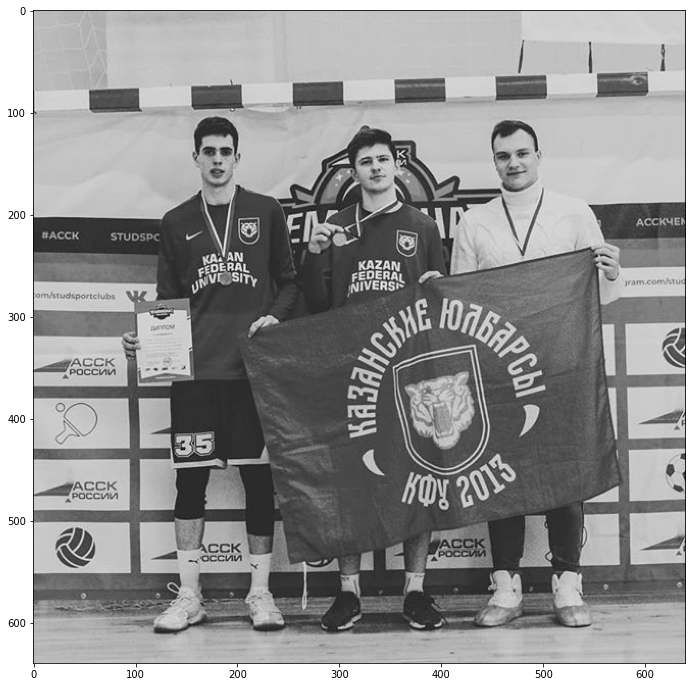

Фото с выделенными лицами:



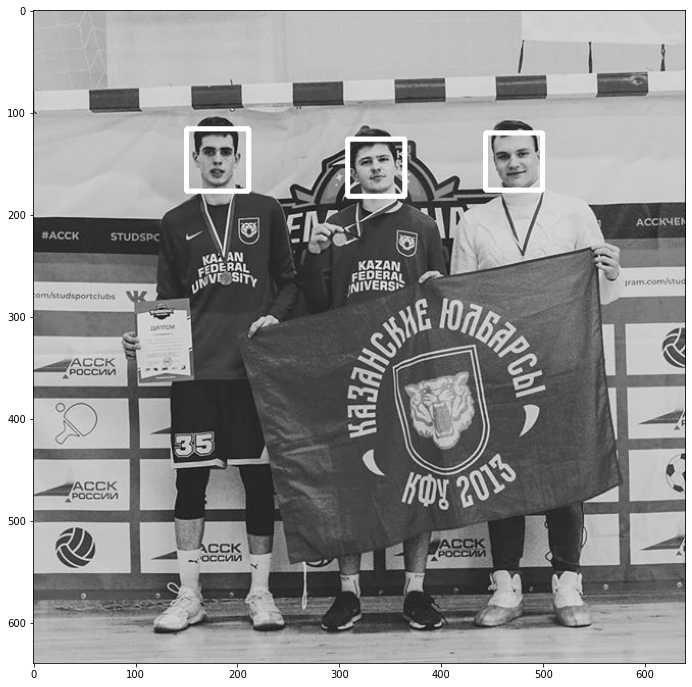

In [21]:
import cv2
import matplotlib.pyplot as plt

face_utilsfont = cv2.FONT_HERSHEY_SIMPLEX

cascPath = "opencv/data/haarcascades/haarcascade_frontalface_default.xml"
eyePath = "opencv/data/haarcascades/haarcascade_eye.xml"
smilePath = "opencv/data/haarcascades/haarcascade_smile.xml"

faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)


def detect_faces():
  return faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    flags=cv2.CASCADE_SCALE_IMAGE
  )

def show_img(img):
  plt.figure(figsize=(16, 12))
  plt.imshow(img, cmap='gray')
  plt.show()

if __name__ == '__main__':
  
  img_path = 'faces.jpg'

  # Load the image
  gray = cv2.imread(img_path, 0)

  print("Изначальное фото переведенное в черно-белое:\n")
  show_img(gray)

  faces = detect_faces()

  # For each face
  for (x, y, w, h) in faces: 
      # Draw rectangle around the face
      cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)

  print("Фото с выделенными лицами:\n")
  show_img(gray)
